# Time series

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import signal
from statsmodels.tsa.stattools import grangercausalitytests

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from pathlib import Path

import os, sys
sys.path.insert(0, os.path.abspath('../src'))

from ts import *
from utils import *

In [2]:
data_path = "../data"

In [3]:
DataDownloader(data_path).download_all_csv()

In [4]:
covidpro_df, dpc_regioni_df, _, _, _ = load_data(data_path)

## Exploration TS: infected Firenze

In [5]:
province = "Firenze"
compart = "New_cases"
date = 'Date'

In [6]:
tmp_df = covidpro_df[covidpro_df.Province == province]

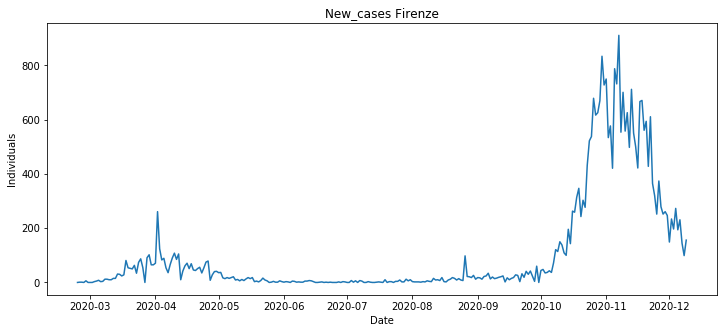

In [7]:
visualize_ts(tmp_df, date, compart, province)

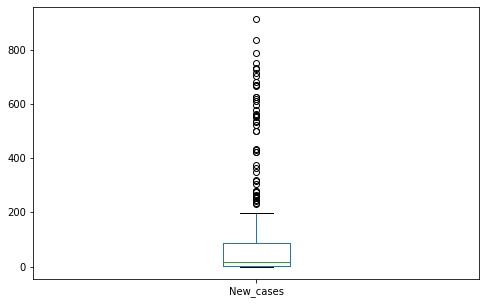

In [8]:
show_boxplot(tmp_df, compart)

In [9]:
tmp_df = tmp_df.set_index(date)

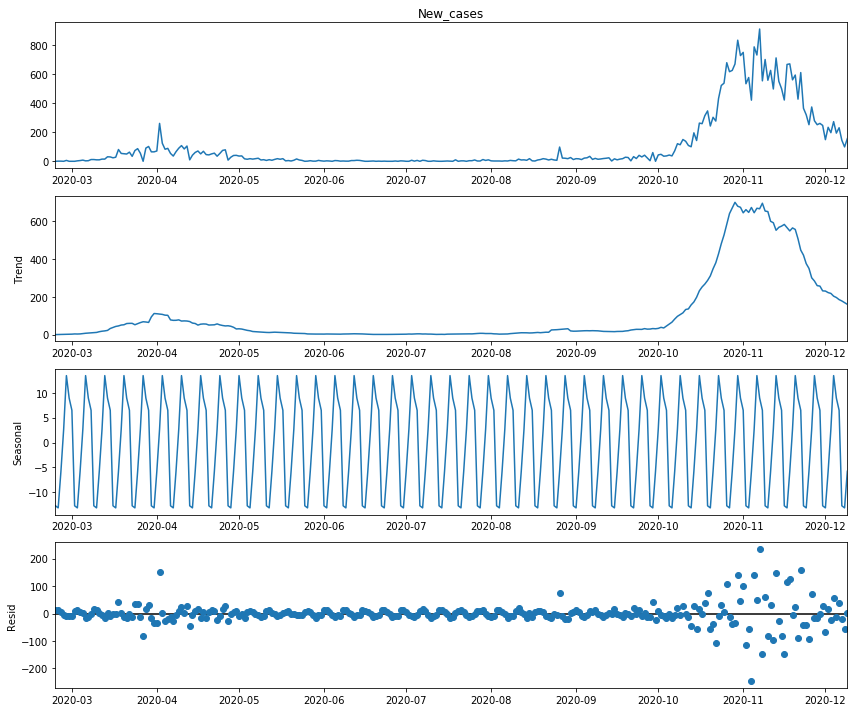

In [10]:
# Additive Decomposition
plot_decomposition(tmp_df, compart)

In [11]:
# Test for stationarity
adf_test(tmp_df[compart].values)

ADF Statistic: -2.9758023534900544
p-value: 0.03721678379146367
Critial Values:
   1%, -3.4544435065994437
Critial Values:
   5%, -2.8721468827772774
Critial Values:
   10%, -2.572422013959188


In [12]:
# Test for trend stationarity
kpss_test(tmp_df[compart].values)


KPSS Statistic: 0.758027
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739
/home/nick/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


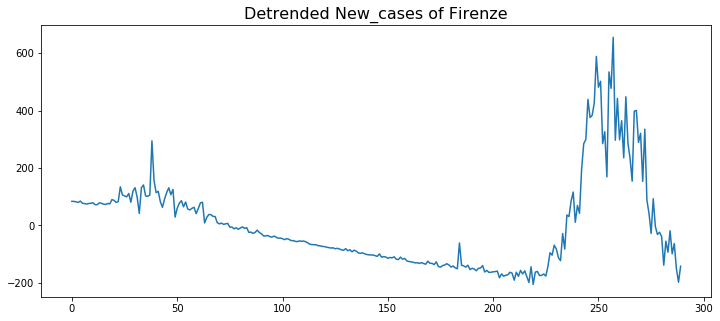

In [13]:
# Detrend by subtracting best leastsq fit
plot_detrended_deseason(
    signal.detrend(tmp_df[compart].values), 
    province,
    compart,
    "Detrended")

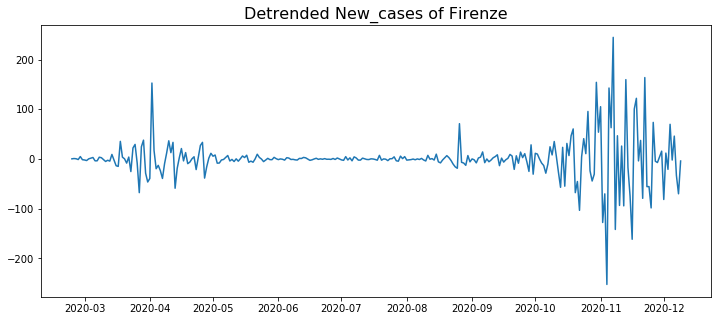

In [14]:
# Detrend by subtracting trend comp
plot_detrended_deseason(
    remove_trend(tmp_df, compart), 
    province,
    compart,
    "Detrended")

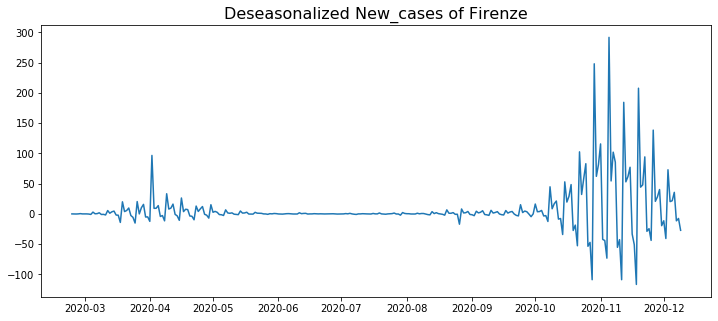

In [15]:
# Deseasonalize by subtracting trend
plot_detrended_deseason(
    deseason_trend(tmp_df, compart), 
    province,
    compart,
    "Deseasonalized")

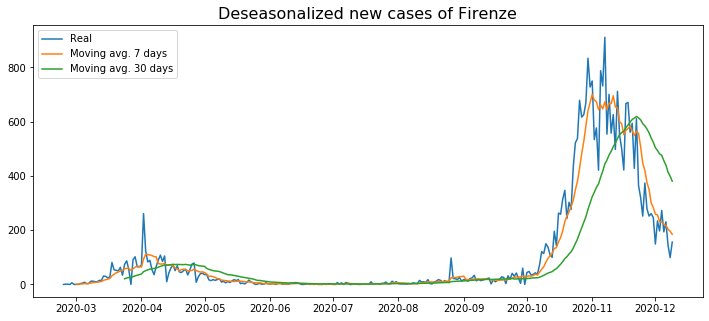

In [16]:
# Deseasonalize by taking mov. avg. with length = seasonal window
plot_deseason_ma(tmp_df, compart, province)

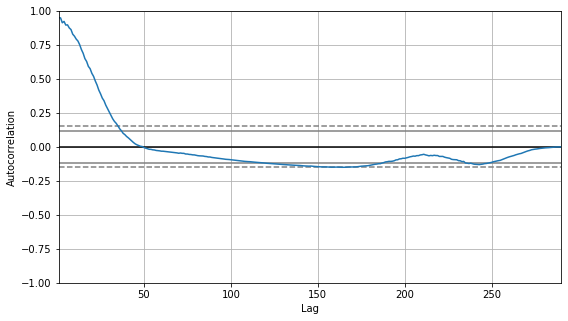

In [17]:
# Seasonality test
plot_autocorr(tmp_df, compart)

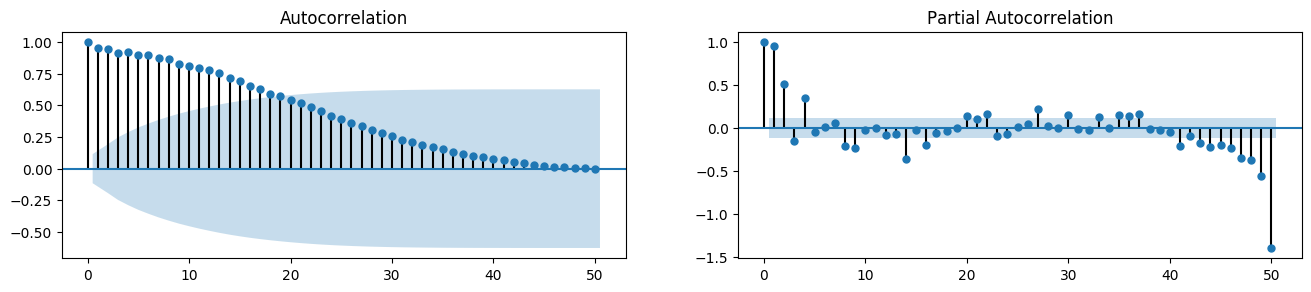

In [18]:
# Autocorrelation and partial autocorrelation
plot_acf_pacf(tmp_df, compart)

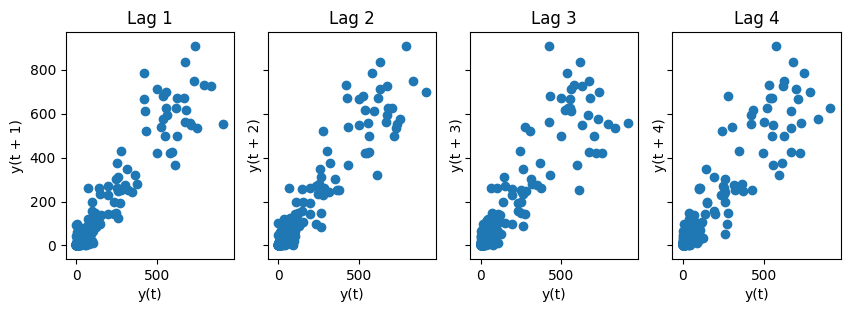

In [19]:
"""
Lag plots:
If points get wide and scattered with increasing lag, 
this means lesser correlation
"""

plot_lag_plots(tmp_df, compart)

In [20]:
# Estimate forecastability
print("SampEn:", SampEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values)))
print("ApproxEn:", ApEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values))) 

SampEn: 0.08969363102750517
ApproxEn: 0.24777649675081914


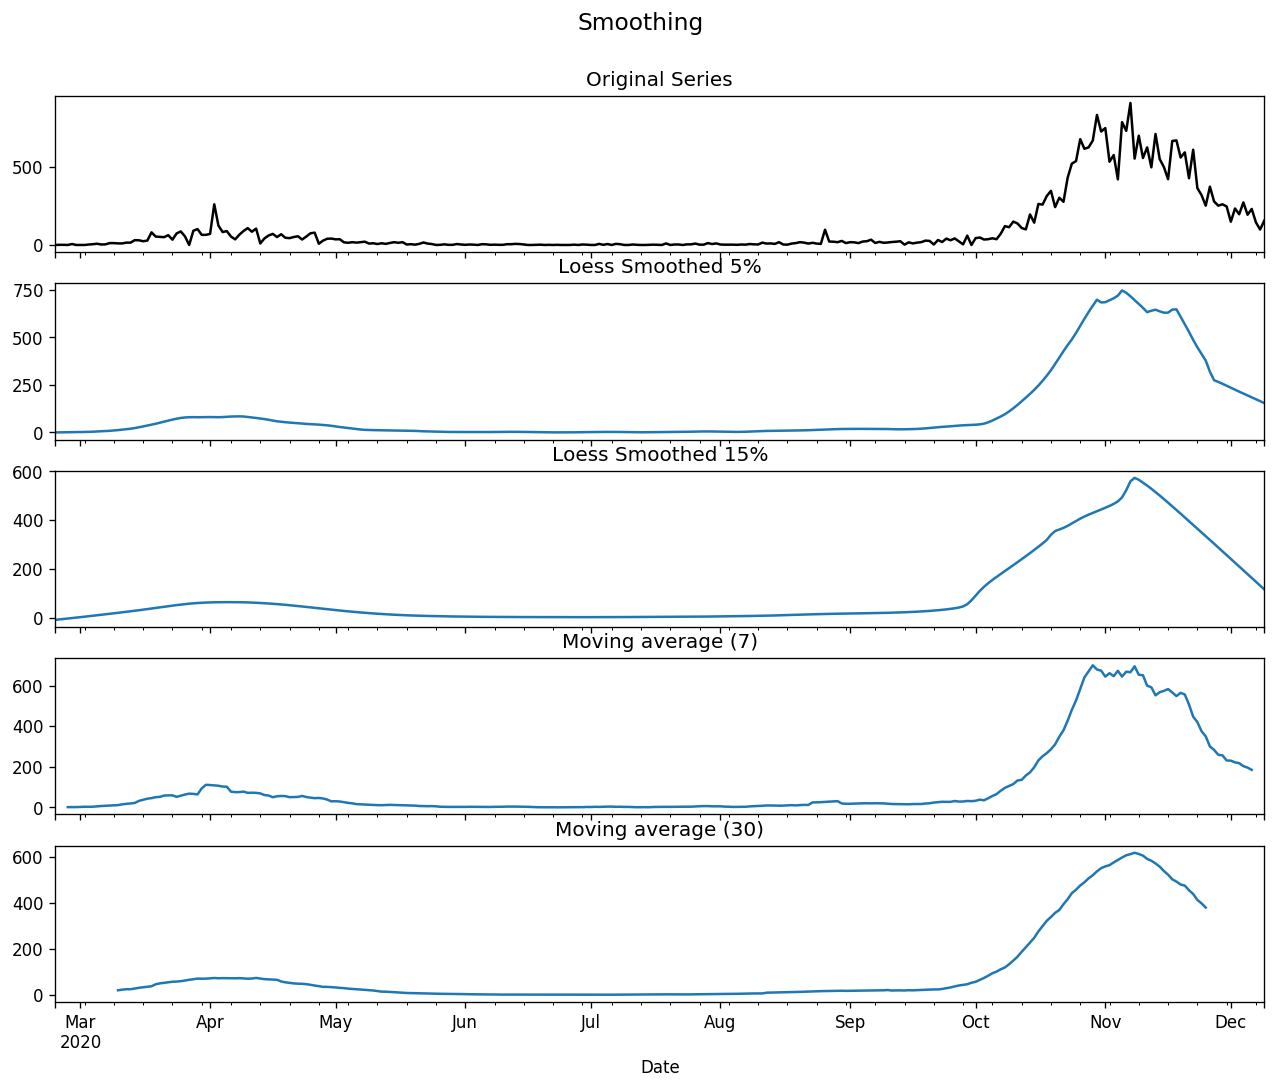

In [21]:
# Smoothing
plot_smoothing(tmp_df, compart)

In [22]:
"""
Granger causality tests:

Infected - Month
Infected - Deaths
"""

tmp_df = covidpro_df[covidpro_df.Province == province]

tmp_df['month'] = tmp_df[date].dt.month
gc_res = grangercausalitytests(tmp_df[[compart, 'month']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0126  , p=0.0837  , df_denom=286, df_num=1
ssr based chi2 test:   chi2=3.0442  , p=0.0810  , df=1
likelihood ratio test: chi2=3.0282  , p=0.0818  , df=1
parameter F test:         F=3.0126  , p=0.0837  , df_denom=286, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3696  , p=0.6914  , df_denom=283, df_num=2
ssr based chi2 test:   chi2=0.7522  , p=0.6865  , df=2
likelihood ratio test: chi2=0.7512  , p=0.6869  , df=2
parameter F test:         F=0.3696  , p=0.6914  , df_denom=283, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6856  , p=0.5615  , df_denom=280, df_num=3
ssr based chi2 test:   chi2=2.1082  , p=0.5502  , df=3
likelihood ratio test: chi2=2.1005  , p=0.5518  , df=3
parameter F test:         F=0.6856  , p=0.5615  , df_denom=280, df_num=3


In [23]:
gc_res = grangercausalitytests(tmp_df[[compart, 'Deaths']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7995  , p=0.3720  , df_denom=286, df_num=1
ssr based chi2 test:   chi2=0.8079  , p=0.3688  , df=1
likelihood ratio test: chi2=0.8067  , p=0.3691  , df=1
parameter F test:         F=0.7995  , p=0.3720  , df_denom=286, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5788  , p=0.0776  , df_denom=283, df_num=2
ssr based chi2 test:   chi2=5.2488  , p=0.0725  , df=2
likelihood ratio test: chi2=5.2015  , p=0.0742  , df=2
parameter F test:         F=2.5788  , p=0.0776  , df_denom=283, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2330  , p=0.2980  , df_denom=280, df_num=3
ssr based chi2 test:   chi2=3.7915  , p=0.2849  , df=3
likelihood ratio test: chi2=3.7666  , p=0.2878  , df=3
parameter F test:         F=1.2330  , p=0.2980  , df_denom=280, df_num=3


## Exploration TS: deaths Firenze

In [24]:
province = "Firenze"
compart = "Deaths"
date = 'Date'

In [25]:
tmp_df = covidpro_df[covidpro_df.Province == province]

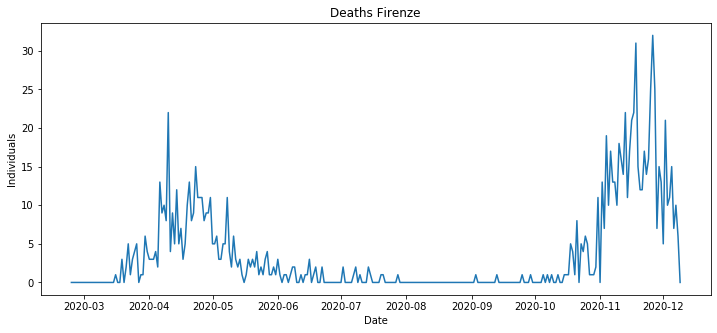

In [26]:
visualize_ts(tmp_df, date, compart, province)

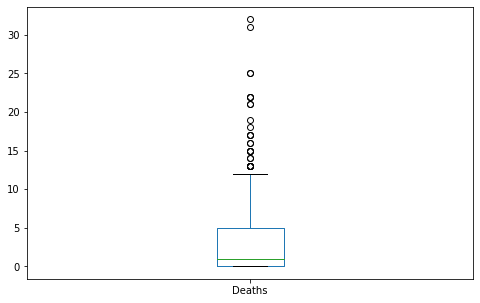

In [27]:
show_boxplot(tmp_df, compart)

In [28]:
tmp_df = tmp_df.set_index(date)

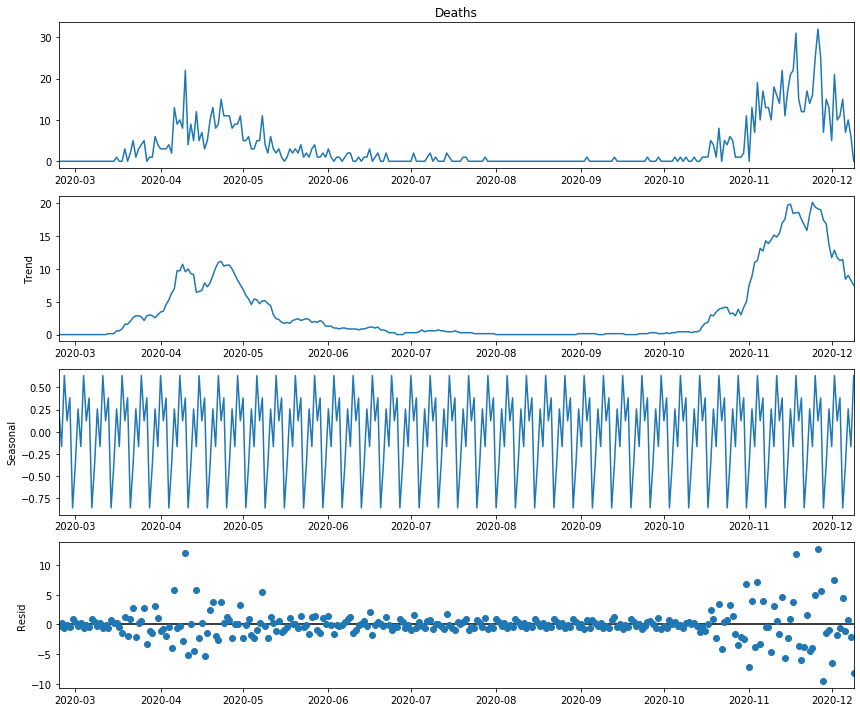

In [29]:
# Additive Decomposition
plot_decomposition(tmp_df, compart)

In [30]:
# Test for stationarity
adf_test(tmp_df[compart].values)

ADF Statistic: -2.7519413702967155
p-value: 0.06547326647232678
Critial Values:
   1%, -3.45453261164607
Critial Values:
   5%, -2.8721859575020017
Critial Values:
   10%, -2.572442854861866


In [31]:
# Test for trend stationarity
kpss_test(tmp_df[compart].values)


KPSS Statistic: 0.365743
p-value: 0.091921
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


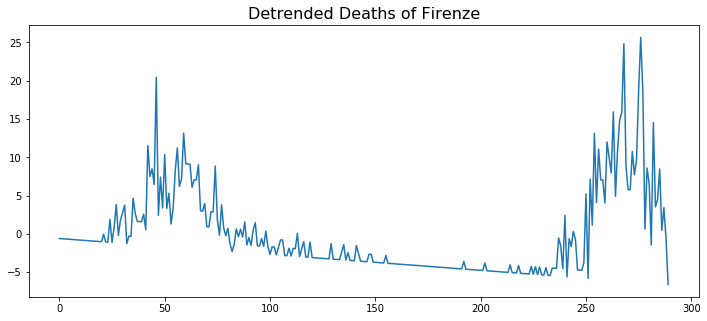

In [32]:
# Detrend by subtracting best leastsq fit
plot_detrended_deseason(
    signal.detrend(tmp_df[compart].values), 
    province,
    compart,
    "Detrended")

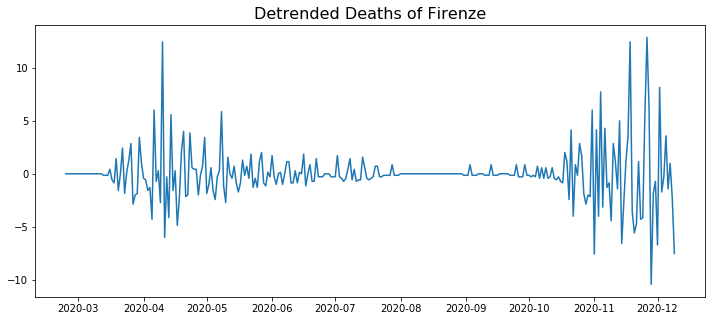

In [33]:
# Detrend by subtracting trend comp
plot_detrended_deseason(
    remove_trend(tmp_df, compart), 
    province,
    compart,
    "Detrended")

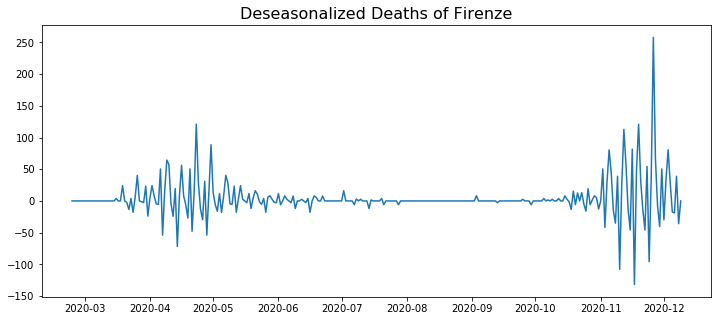

In [34]:
# Deseasonalize by subtracting trend
plot_detrended_deseason(
    deseason_trend(tmp_df, compart), 
    province,
    compart,
    "Deseasonalized")

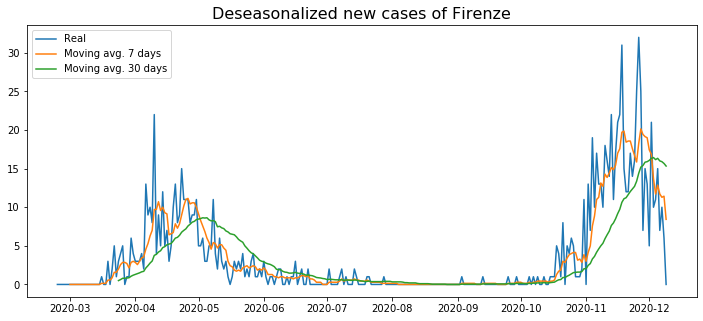

In [35]:
# Deseasonalize by taking mov. avg. with length = seasonal window
plot_deseason_ma(tmp_df, compart, province)

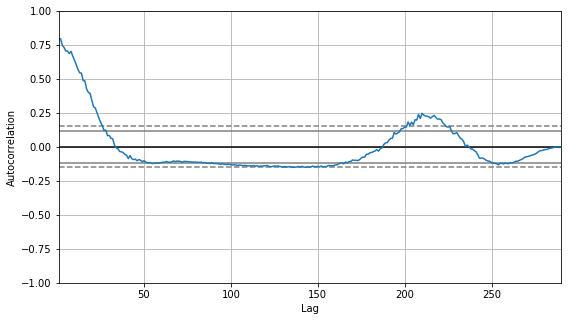

In [36]:
# Seasonality test
plot_autocorr(tmp_df, compart)

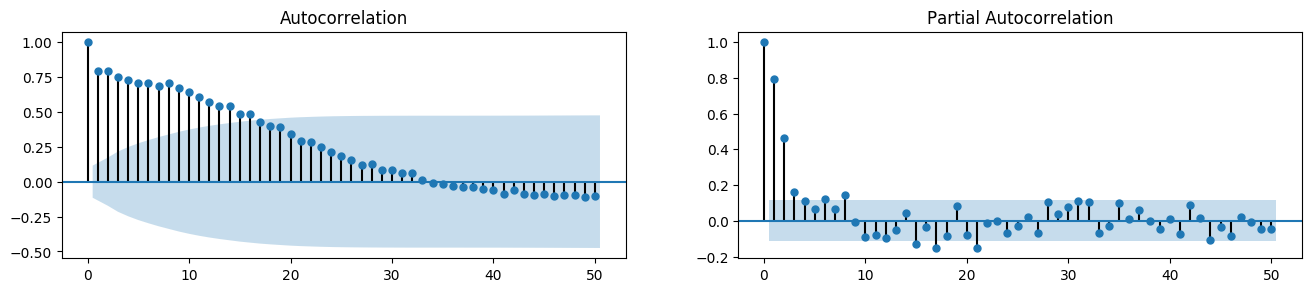

In [37]:
# Autocorrelation and partial autocorrelation
plot_acf_pacf(tmp_df, compart)

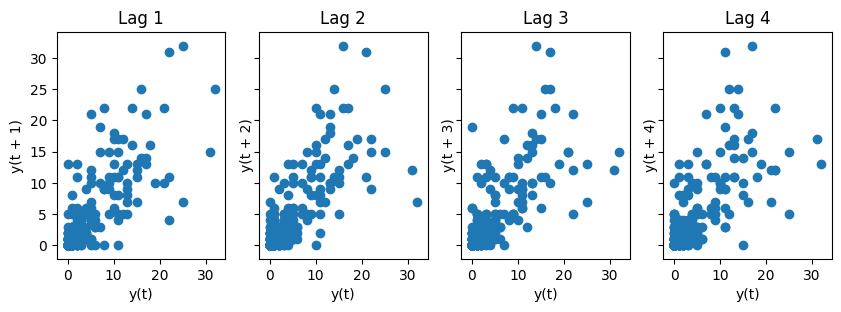

In [38]:
"""
Lag plots:
If points get wide and scattered with increasing lag, 
this means lesser correlation
"""

plot_lag_plots(tmp_df, compart)

In [39]:
# Estimate forecastability
print("SampEn:", SampEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values)))
print("ApproxEn:", ApEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values))) 

SampEn: 0.18732204802912877
ApproxEn: 0.47577134095104867


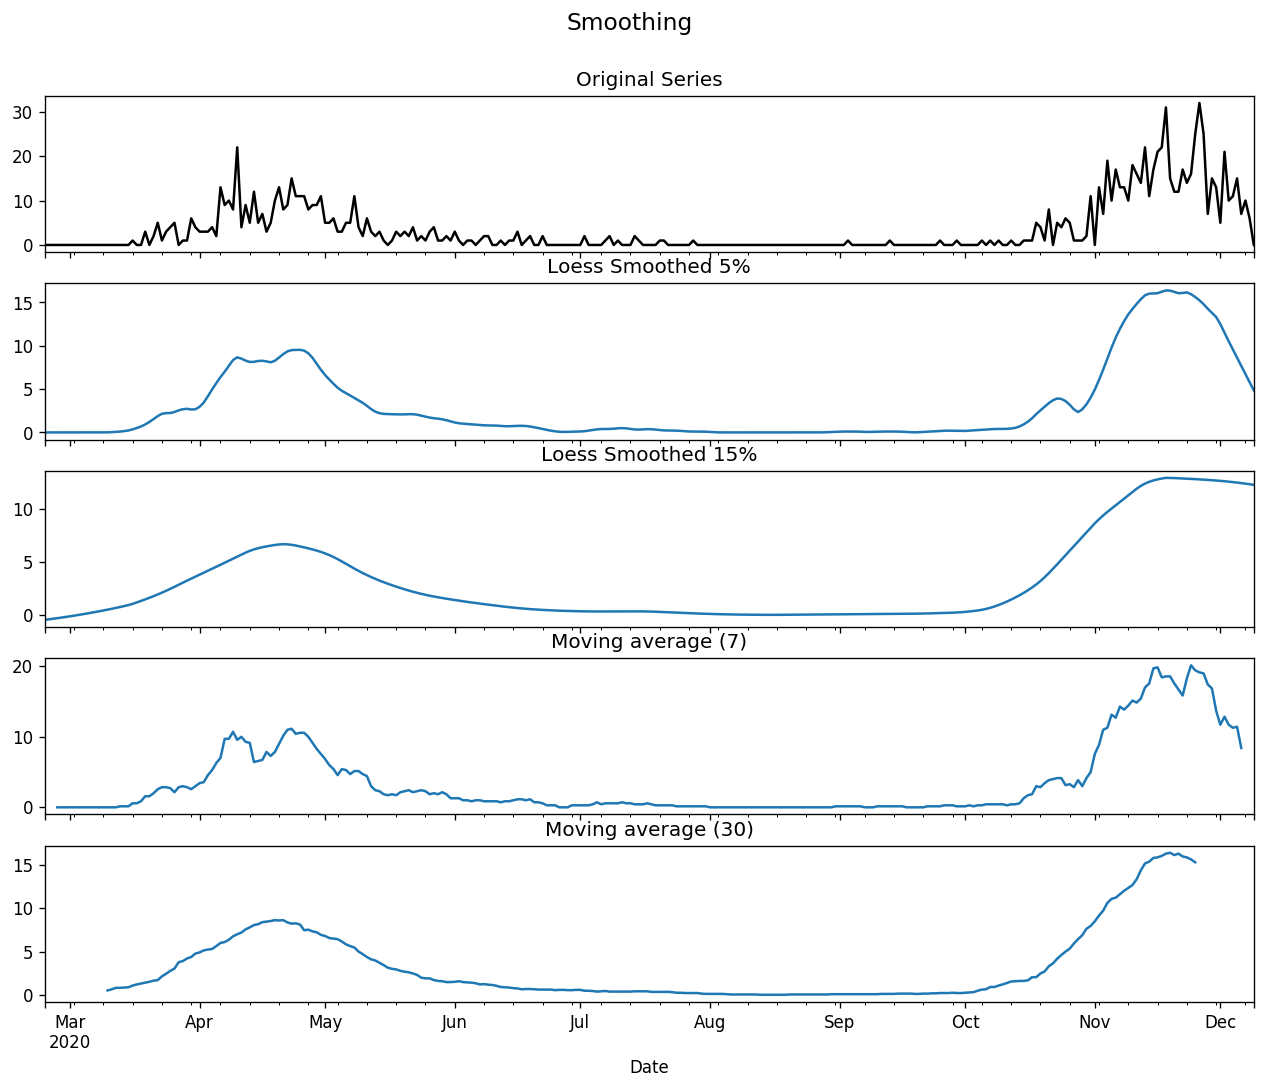

In [40]:
# Smoothing
plot_smoothing(tmp_df, compart)

In [41]:
"""
Granger causality tests:

Infected - Month
Infected - Deaths
"""

tmp_df = covidpro_df[covidpro_df.Province == province]

tmp_df['month'] = tmp_df[date].dt.month
gc_res = grangercausalitytests(tmp_df[[compart, 'month']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8913  , p=0.0901  , df_denom=286, df_num=1
ssr based chi2 test:   chi2=2.9216  , p=0.0874  , df=1
likelihood ratio test: chi2=2.9069  , p=0.0882  , df=1
parameter F test:         F=2.8913  , p=0.0901  , df_denom=286, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6630  , p=0.1914  , df_denom=283, df_num=2
ssr based chi2 test:   chi2=3.3847  , p=0.1841  , df=2
likelihood ratio test: chi2=3.3649  , p=0.1859  , df=2
parameter F test:         F=1.6630  , p=0.1914  , df_denom=283, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0205  , p=0.3840  , df_denom=280, df_num=3
ssr based chi2 test:   chi2=3.1379  , p=0.3708  , df=3
likelihood ratio test: chi2=3.1209  , p=0.3734  , df=3
parameter F test:         F=1.0205  , p=0.3840  , df_denom=280, df_num=3


In [42]:
gc_res = grangercausalitytests(tmp_df[[compart, 'Deaths']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=287, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=485.5733, p=0.0000  , df_denom=287, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=285, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=339.8168, p=0.0000  , df_denom=285, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=-0.0000 , p=1.0000  , df_denom=283, df_num=3
ssr based chi2 test:   chi2=-0.0000 , p=1.0000  , df=3
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=3
parameter F test:         F=232.1738, p=0.0000  , df_denom=283, df_num=3


## Exploration TS: infected Piemonte

In [43]:
province = "Piemonte"
compart = "nuovi_positivi"
date = 'data'

In [44]:
tmp_df = dpc_regioni_df[dpc_regioni_df.denominazione_regione == province]

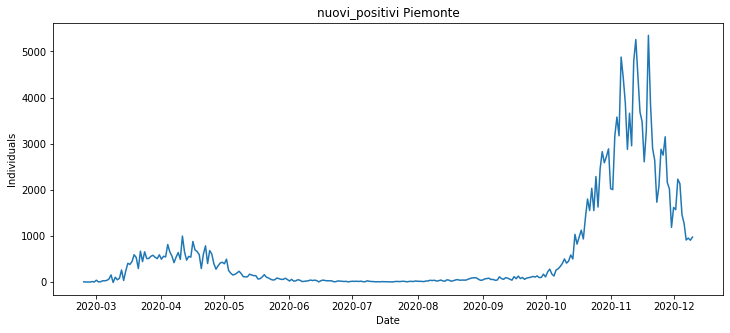

In [45]:
visualize_ts(tmp_df, date, compart, province)

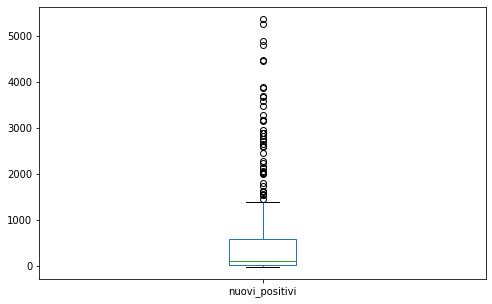

In [46]:
show_boxplot(tmp_df, compart)

In [47]:
tmp_df = tmp_df.set_index(date)

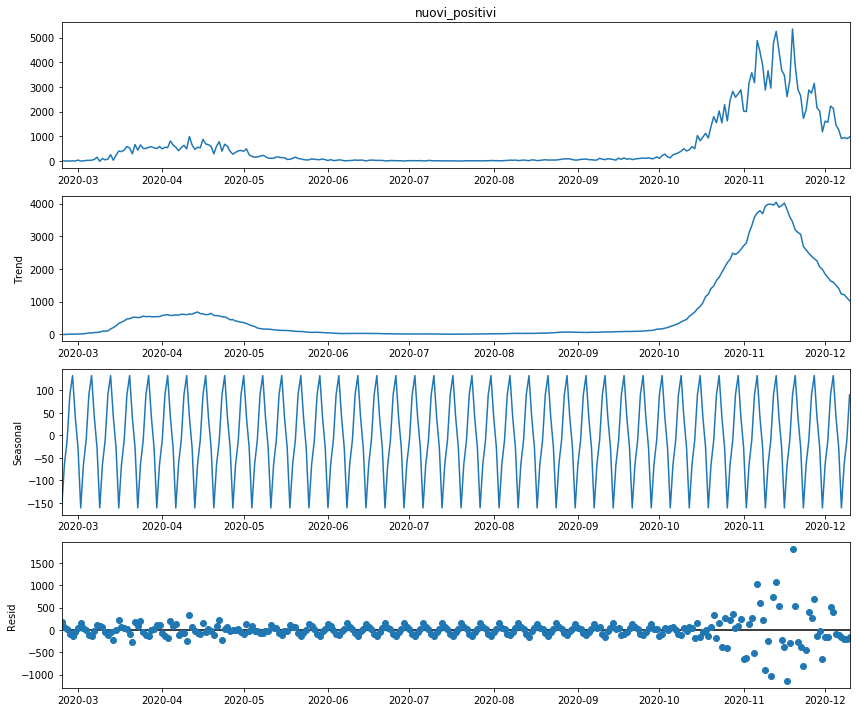

In [48]:
# Additive Decomposition
plot_decomposition(tmp_df, compart)

In [49]:
# Test for stationarity
adf_test(tmp_df[compart].values)

ADF Statistic: -3.3560158064650696
p-value: 0.012552855296211371
Critial Values:
   1%, -3.4540935579190495
Critial Values:
   5%, -2.8719934111688965
Critial Values:
   10%, -2.5723401594120388


In [50]:
# Test for trend stationarity
kpss_test(tmp_df[compart].values)


KPSS Statistic: 0.703087
p-value: 0.013265
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


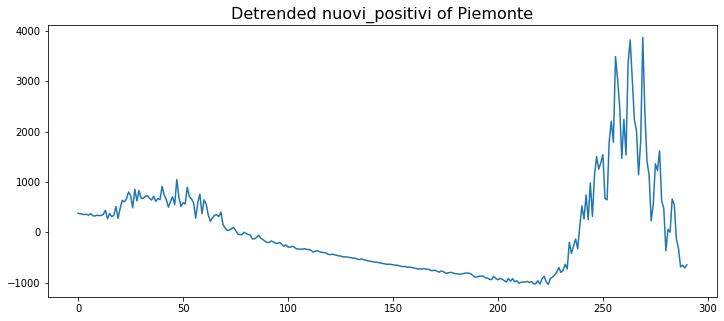

In [51]:
# Detrend by subtracting best leastsq fit
plot_detrended_deseason(
    signal.detrend(tmp_df[compart].values), 
    province,
    compart,
    "Detrended")

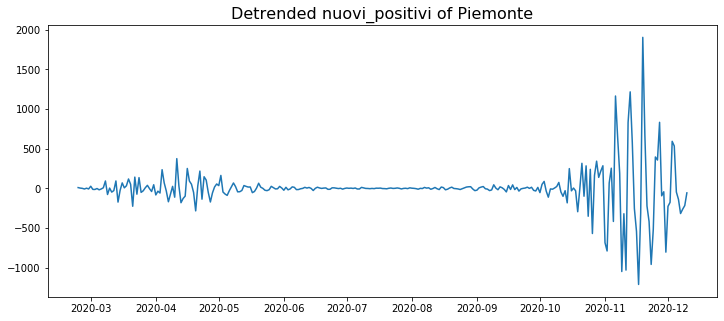

In [52]:
# Detrend by subtracting trend comp
plot_detrended_deseason(
    remove_trend(tmp_df, compart), 
    province,
    compart,
    "Detrended")

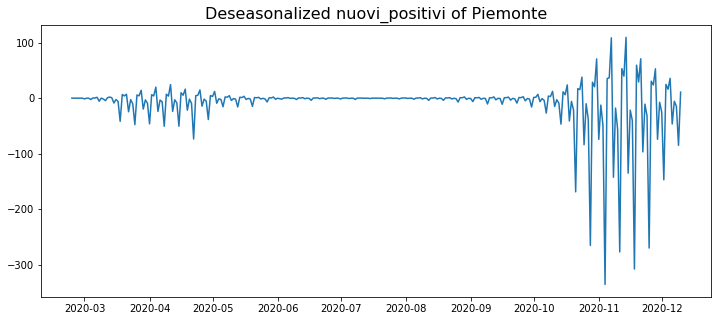

In [53]:
# Deseasonalize by subtracting trend
plot_detrended_deseason(
    deseason_trend(tmp_df, compart), 
    province,
    compart,
    "Deseasonalized")

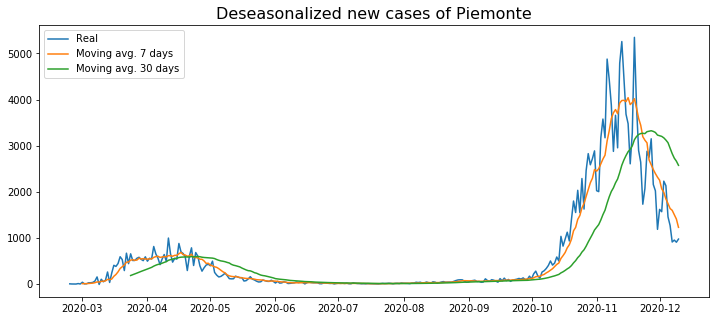

In [54]:
# Deseasonalize by taking mov. avg. with length = seasonal window
plot_deseason_ma(tmp_df, compart, province)

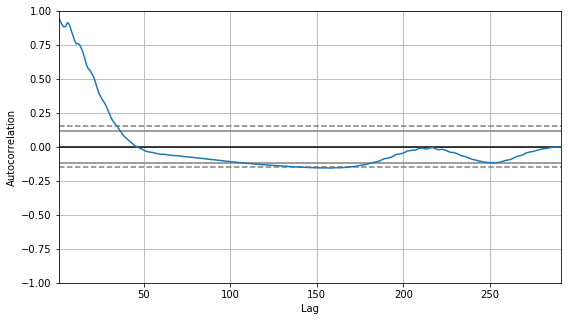

In [55]:
# Seasonality test
plot_autocorr(tmp_df, compart)

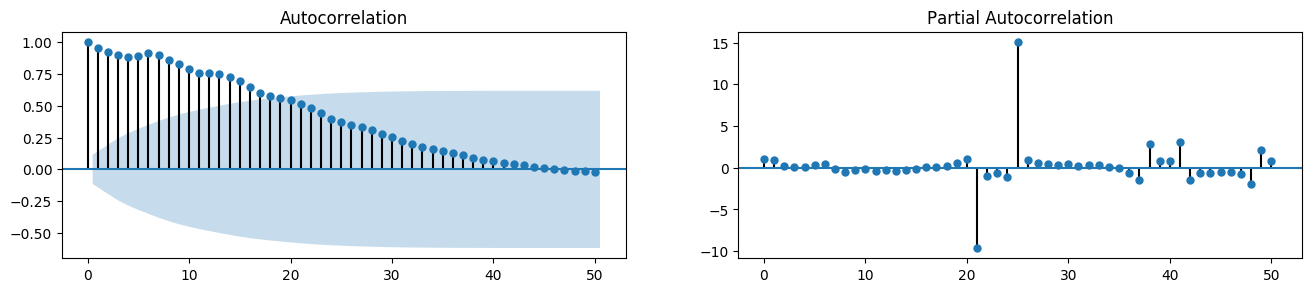

In [56]:
# Autocorrelation and partial autocorrelation
plot_acf_pacf(tmp_df, compart)

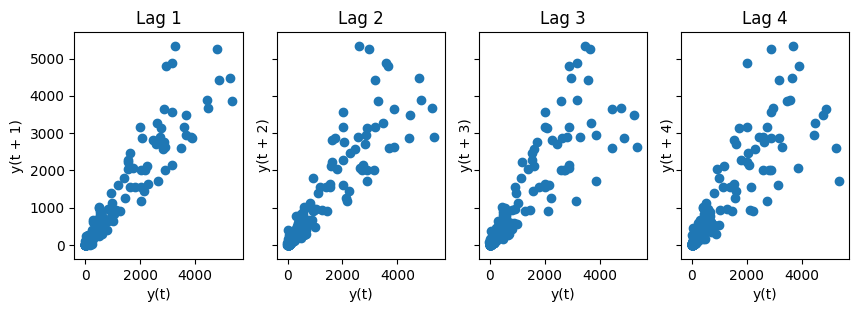

In [57]:
"""
Lag plots:
If points get wide and scattered with increasing lag, 
this means lesser correlation
"""

plot_lag_plots(tmp_df, compart)

In [58]:
# Estimate forecastability
print("SampEn:", SampEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values)))
print("ApproxEn:", ApEn(tmp_df[compart].values, m=2, r=0.2*np.std(tmp_df[compart].values))) 

SampEn: 0.05778282138264353
ApproxEn: 0.22056687391795093


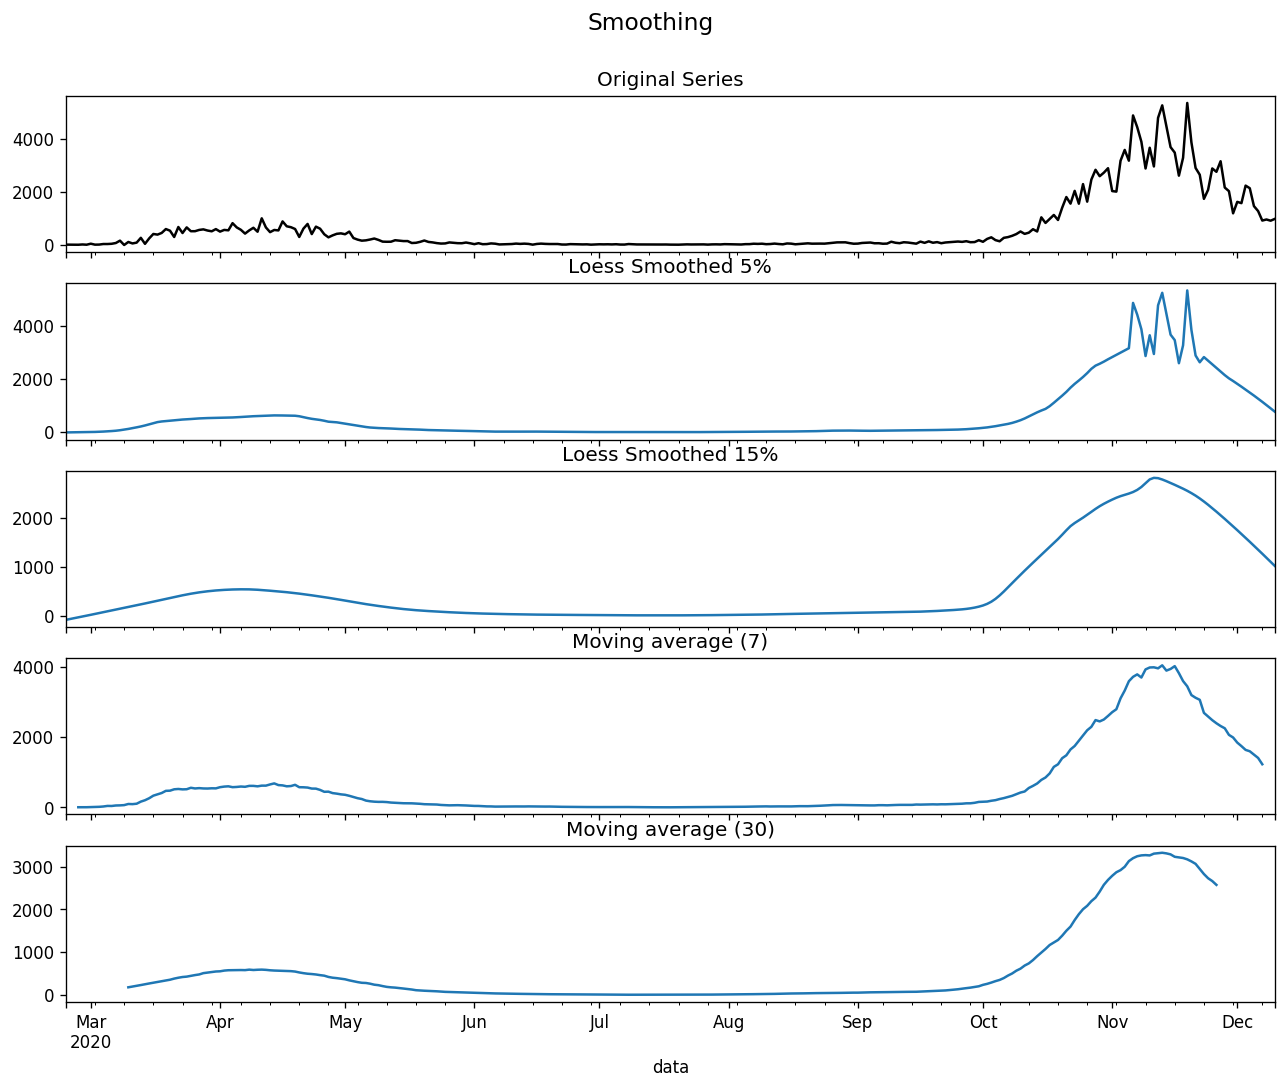

In [59]:
# Smoothing
plot_smoothing(tmp_df, compart)

In [60]:
"""
Granger causality tests:

Deaths - Month
Deaths - Infected
"""


tmp_df = dpc_regioni_df[dpc_regioni_df.denominazione_regione == province]

tmp_df['month'] = tmp_df[date].dt.month
gc_res = grangercausalitytests(tmp_df[[compart, 'month']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.8526  , p=0.0923  , df_denom=287, df_num=1
ssr based chi2 test:   chi2=2.8824  , p=0.0896  , df=1
likelihood ratio test: chi2=2.8682  , p=0.0903  , df=1
parameter F test:         F=2.8526  , p=0.0923  , df_denom=287, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0530  , p=0.3502  , df_denom=284, df_num=2
ssr based chi2 test:   chi2=2.1431  , p=0.3425  , df=2
likelihood ratio test: chi2=2.1352  , p=0.3438  , df=2
parameter F test:         F=1.0530  , p=0.3502  , df_denom=284, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2254  , p=0.3007  , df_denom=281, df_num=3
ssr based chi2 test:   chi2=3.7677  , p=0.2877  , df=3
likelihood ratio test: chi2=3.7433  , p=0.2906  , df=3
parameter F test:         F=1.2254  , p=0.3007  , df_denom=281, df_num=3


In [61]:
gc_res = grangercausalitytests(tmp_df[[compart, 'deceduti']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0547  , p=0.8152  , df_denom=287, df_num=1
ssr based chi2 test:   chi2=0.0553  , p=0.8141  , df=1
likelihood ratio test: chi2=0.0553  , p=0.8141  , df=1
parameter F test:         F=0.0547  , p=0.8152  , df_denom=287, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0057  , p=0.9943  , df_denom=284, df_num=2
ssr based chi2 test:   chi2=0.0117  , p=0.9942  , df=2
likelihood ratio test: chi2=0.0117  , p=0.9942  , df=2
parameter F test:         F=0.0057  , p=0.9943  , df_denom=284, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0785  , p=0.9716  , df_denom=281, df_num=3
ssr based chi2 test:   chi2=0.2413  , p=0.9707  , df=3
likelihood ratio test: chi2=0.2412  , p=0.9707  , df=3
parameter F test:         F=0.0785  , p=0.9716  , df_denom=281, df_num=3


## Prediction

In [62]:
province = "Firenze"
compart = "New_cases"
date = 'Date'

tmp_df = covidpro_df[covidpro_df.Province == province]
tmp_df = tmp_df.set_index(date)

In [63]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [64]:
def adv_ma_plot(df, compart, window, plot_intervals=False, scale=1.96, plot_anomalies=False, show_anomalies_label=False, legend_position='upper left'):
    rolling_mean = df[[compart]].rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    #plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    if plot_intervals:
        mae = mean_absolute_error(df[[compart]][window:], rolling_mean[window:])
        deviation = np.std(df[[compart]][window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, "r--", label="Upper Bound / Lower Bound")
        plt.plot(lower_bound, "r--")
        
        if plot_anomalies:
            
            anomalies = pd.DataFrame(index=df[[compart]].index, columns=df[[compart]].columns)
            anomalies[df[[compart]]<lower_bound] = df[[compart]][df[[compart]]<lower_bound]
            anomalies[df[[compart]]>upper_bound] = df[[compart]][df[[compart]]>upper_bound]
            plt.plot(anomalies, "ro", markersize=10)

            if show_anomalies_label:
                ymin, ymax = plt.ylim()
                plt.vlines(anomalies.dropna().index, ymin=ymin, ymax=ymax, linestyles='dashed', colors='grey')
                for x in anomalies.dropna().index:
                    plt.text(x, ymin + 20, x.strftime('%m-%d'), rotation=90, verticalalignment='center')
        
    plt.plot(df[[compart]][window:], label="Actual values")
    plt.legend(loc=legend_position)
    plt.show()

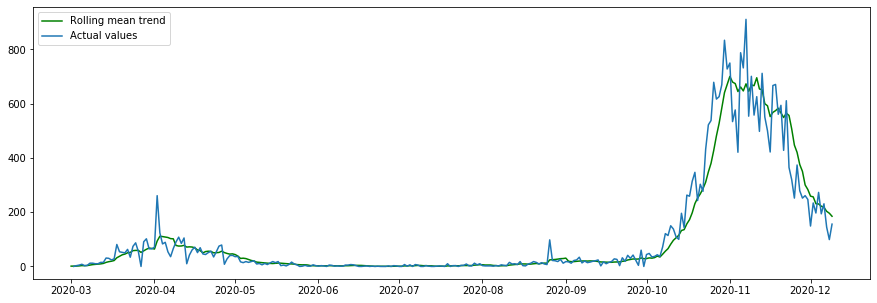

In [65]:
adv_ma_plot(tmp_df, compart, 7)

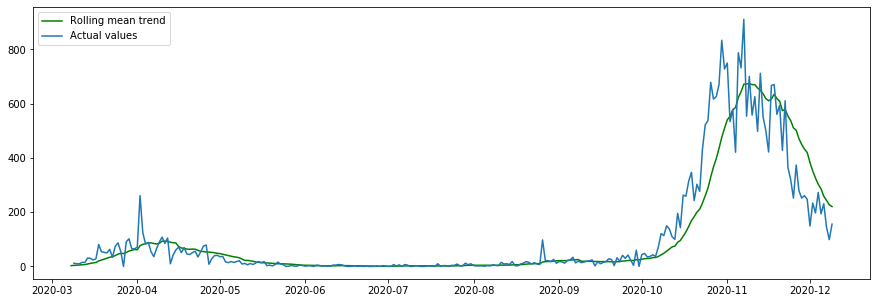

In [66]:
adv_ma_plot(tmp_df, compart, 14)

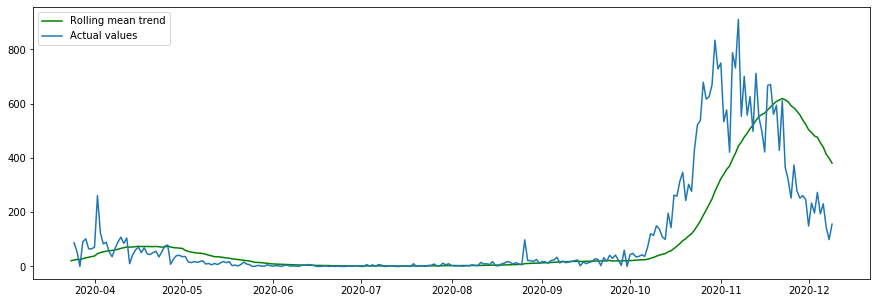

In [67]:
adv_ma_plot(tmp_df, compart, 30)

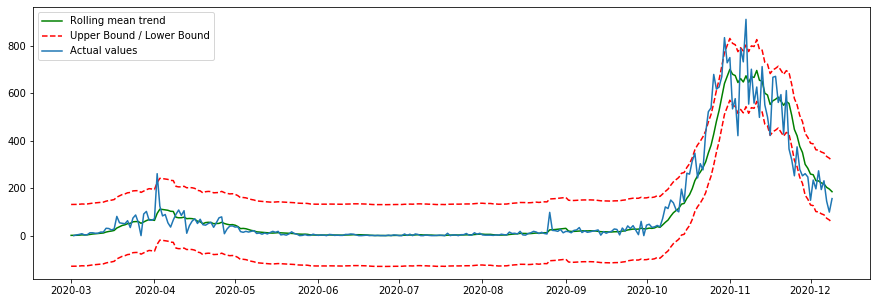

In [68]:
adv_ma_plot(tmp_df, compart, 7, plot_intervals=True)

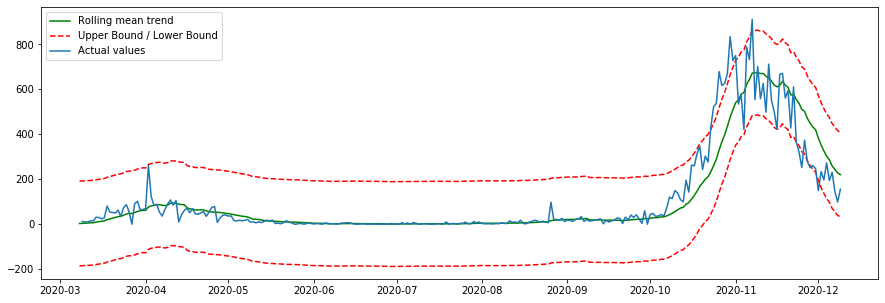

In [69]:
adv_ma_plot(tmp_df, compart, 14, plot_intervals=True)

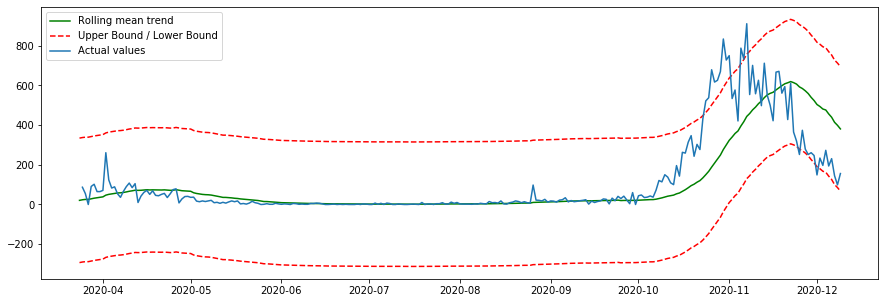

In [70]:
adv_ma_plot(tmp_df, compart, 30, plot_intervals=True)

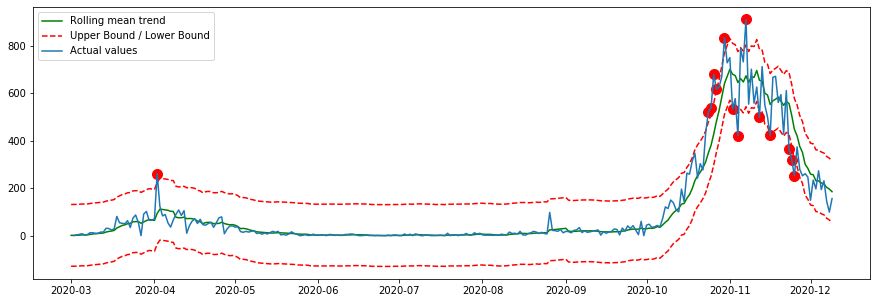

In [71]:
adv_ma_plot(tmp_df, compart, 7, plot_intervals=True, plot_anomalies=True)

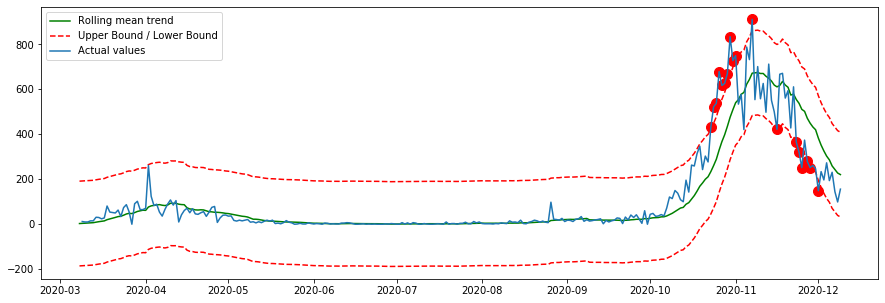

In [72]:
adv_ma_plot(tmp_df, compart, 14, plot_intervals=True, plot_anomalies=True)

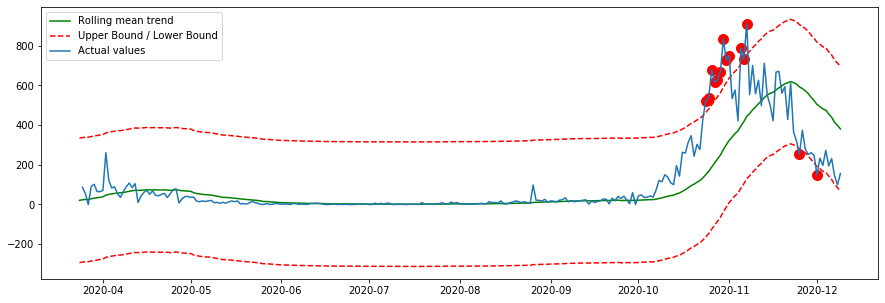

In [73]:
adv_ma_plot(tmp_df, compart, 30, plot_intervals=True, plot_anomalies=True)

In [74]:
province = "Firenze"
compart = "New_cases"
date = 'Date'

tmp_df = covidpro_df[covidpro_df.Province == province].query('20200701 > Date')
tmp_df = tmp_df.set_index(date)

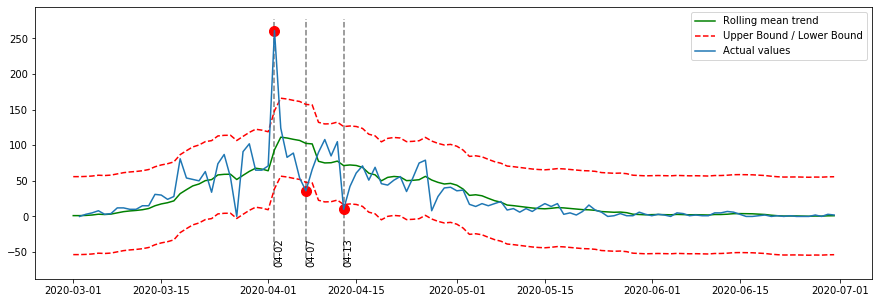

In [75]:
adv_ma_plot(tmp_df, compart, 7, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper right')

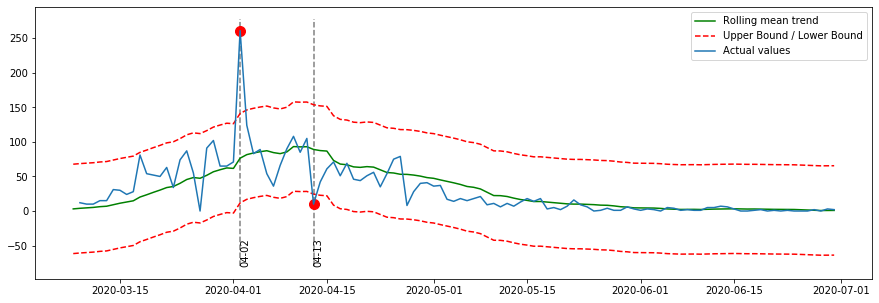

In [76]:
adv_ma_plot(tmp_df, compart, 14, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper right')

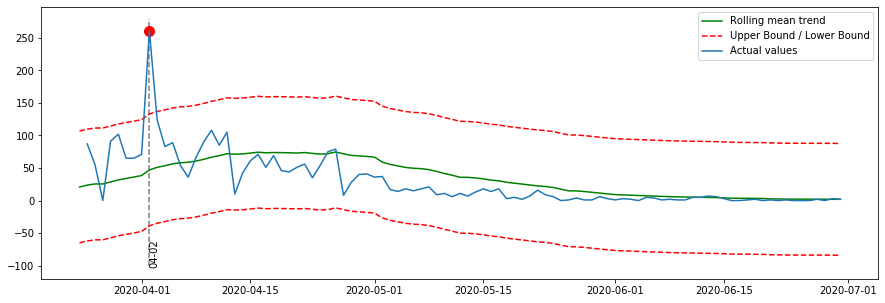

In [77]:
adv_ma_plot(tmp_df, compart, 30, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper right')

In [78]:
province = "Firenze"
compart = "New_cases"
date = 'Date'

tmp_df = covidpro_df[covidpro_df.Province == province].query('20201208 > Date > 20200901')
tmp_df = tmp_df.set_index(date)

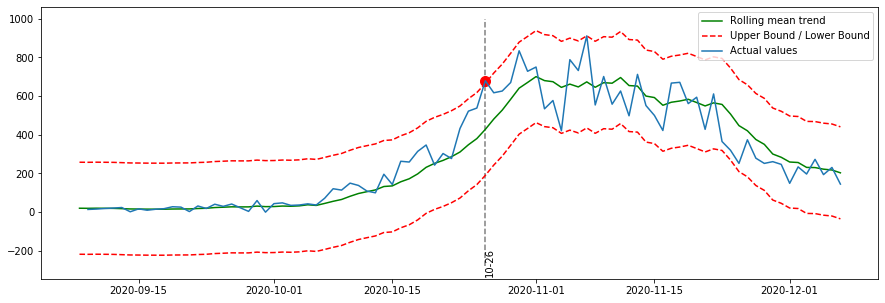

In [79]:
adv_ma_plot(tmp_df, compart, 7, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper right')

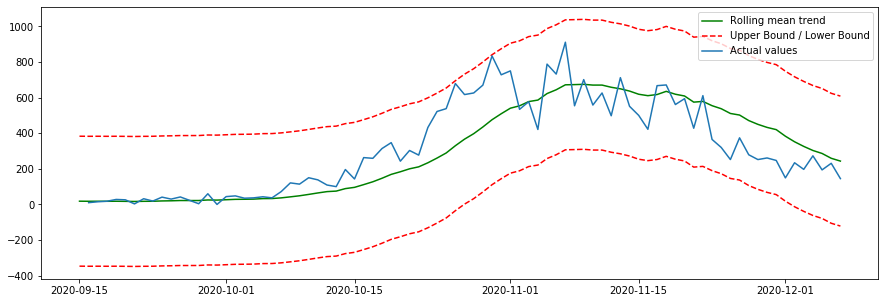

In [80]:
adv_ma_plot(tmp_df, compart, 14, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper right')

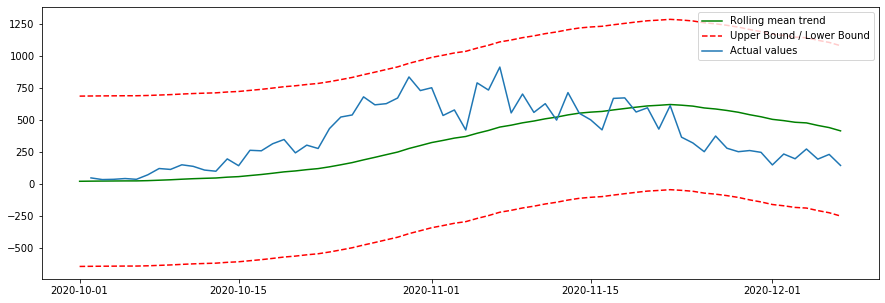

In [81]:
adv_ma_plot(tmp_df, compart, 30, plot_intervals=True, plot_anomalies=True, show_anomalies_label=True, legend_position='upper right')

In [119]:
province = "Firenze"
compart = "New_cases"
date = 'Date'

tmp_df = covidpro_df[covidpro_df.Province == province].query('20200701 > Date')
tmp_df[compart] = tmp_df[compart].apply(lambda x: 0 if x is np.nan or x < 0 else x)
tmp_df = tmp_df.set_index(date)

In [120]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt

train = tmp_df[[compart]].query('20200601 > Date')
test = tmp_df[[compart]].query('20200601 <= Date')

model = ExponentialSmoothing(train[compart].values)
model_fit = model.fit()

yhat = model_fit.predict(start=0,end=len(test)-1)

In [121]:
print("AIC:", model_fit.aic)
print("AICC:", model_fit.aicc)
print("BIC:", model_fit.bic)
print("k:", model_fit.k)
print("SSE:", model_fit.sse)
print("\n",model_fit.mle_retvals)

AIC: 656.5547714231992
AICC: 656.9848789500809
BIC: 661.7247063805404
k: 2
SSE: 76396.3069816789

      fun: 76396.3069816789
     jac: array([-0.17871094,  0.00195312])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.28646561, 1.23140556])


In [122]:
model_fit.params_formatted

name     param  optimized
smoothing_level  alpha  0.286466       True
initial_level      l.0  1.231406       True

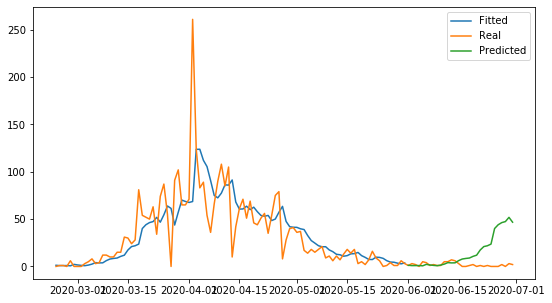

In [123]:
plt.plot(train.index, model_fit.fittedvalues, label='Fitted')
plt.plot(tmp_df.index, tmp_df[compart].values, label='Real')
plt.plot(test.index, yhat, label='Predicted')
plt.legend()
plt.show()

In [124]:
model = Holt(train[compart].values)

# It works with Powell or ls, but not with
# the default L-BFGS-B
model_fit = model.fit(method='Powell')

yhat = model_fit.predict(start=0,end=len(test)-1)

print("AIC:", model_fit.aic)
print("AICC:", model_fit.aicc)
print("BIC:", model_fit.bic)
print("k:", model_fit.k)
print("SSE:", model_fit.sse)
print("\n",model_fit.mle_retvals)

AIC: 661.5025057571232
AICC: 662.4255826802001
BIC: 671.8423756718055
k: 4
SSE: 77138.70118912299

    direc: array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])
     fun: 77138.70118912299
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 2
  status: 0
 success: True
       x: array([ 0.2778123 ,  0.02360651, -1.56260085,  0.77020749])


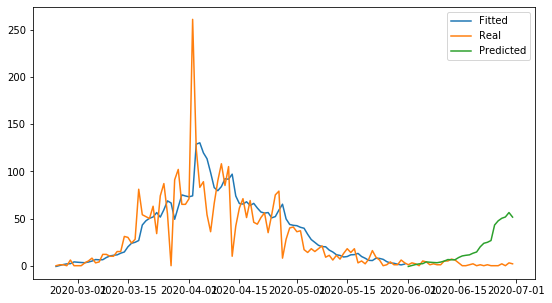

In [125]:
plt.plot(train.index, model_fit.fittedvalues, label='Fitted')
plt.plot(tmp_df.index, tmp_df[compart].values, label='Real')
plt.plot(test.index, yhat, label='Predicted')
plt.legend()
plt.show()

In [126]:
model_es = ExponentialSmoothing(train[compart].values)
model_fit_es = model_es.fit()

yhat_es = model_fit_es.predict(start=0,end=len(test)-1)

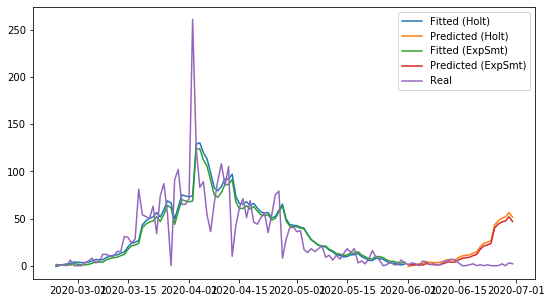

In [127]:
plt.plot(train.index, model_fit.fittedvalues, label='Fitted (Holt)')
plt.plot(test.index, yhat, label='Predicted (Holt)')
plt.plot(train.index, model_fit_es.fittedvalues, label='Fitted (ExpSmt)')
plt.plot(test.index, yhat_es, label='Predicted (ExpSmt)')
plt.plot(tmp_df.index, tmp_df[compart].values, label='Real')
plt.legend()
plt.show()

In [128]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

def tsplot(y, lags=50, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
        
    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

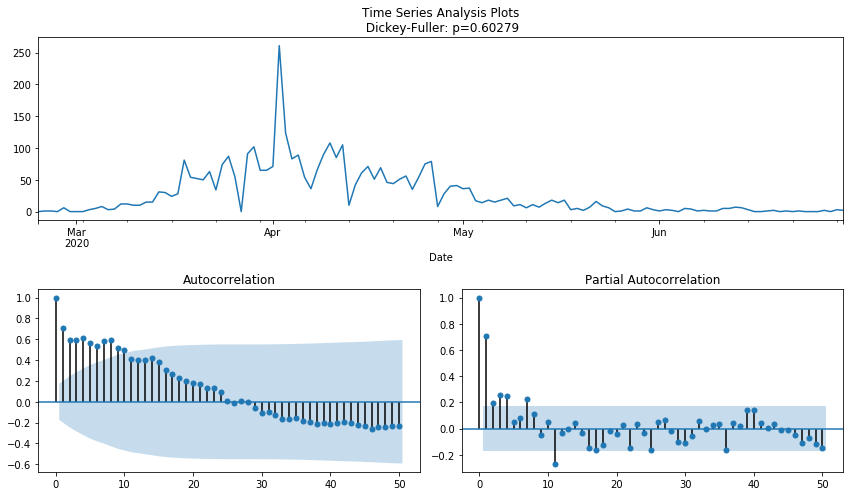

In [129]:
tsplot(tmp_df[compart], lags=50)

In [130]:
adf_test(tmp_df[compart].values)

ADF Statistic: -1.3568368277900387
p-value: 0.6027853897594708
Critial Values:
   1%, -3.487517288664615
Critial Values:
   5%, -2.8865777180380032
Critial Values:
   10%, -2.5801239192052012


In [131]:
kpss_test(tmp_df[compart].values)


KPSS Statistic: 0.378572
p-value: 0.086391
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


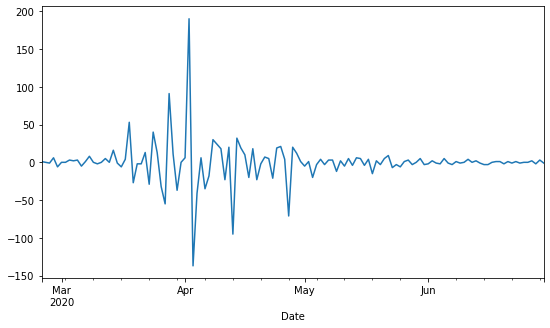

In [150]:
res = tmp_df[compart] - tmp_df[compart].shift(1)
res.dropna().plot()
plt.show()

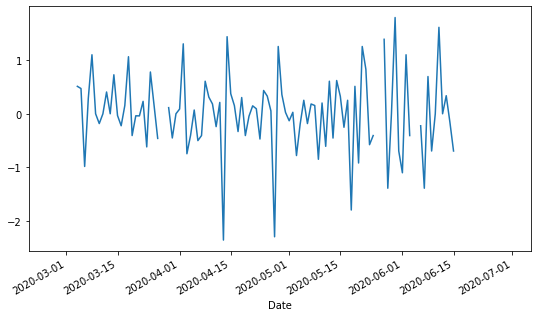

In [137]:
res = np.log(tmp_df[compart]) - np.log(tmp_df[compart]).shift(1)
res.dropna().plot()
plt.show()

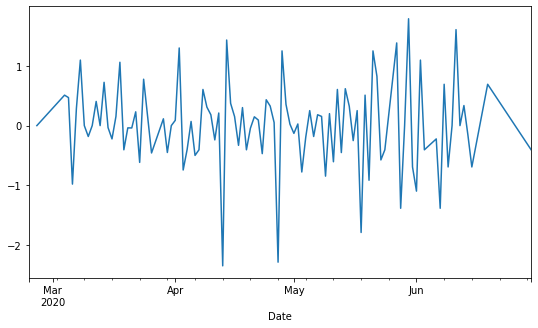

In [143]:
res_fix = res.replace([np.inf, -np.inf], np.nan).interpolate(method='time')
res_fix.plot()
plt.show()

In [146]:
adf_test(res_fix.dropna().values)
kpss_test(res_fix.dropna().values)

ADF Statistic: -10.374148574924691
p-value: 2.224126550856314e-18
Critial Values:
   1%, -3.484219653271961
Critial Values:
   5%, -2.885145235641637
Critial Values:
   10%, -2.579359138917794

KPSS Statistic: 0.180195
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739
/home/nick/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)
